In [41]:
# CNN+Embedding for review classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
import plot_confusion_matrix;

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequence to the same length
max_review_length = 1600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=3, callbacks=[tensorBoardCallback], batch_size=64, validation_split=0.1)

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 595s - loss: 0.4054 - acc: 0.7870 - val_loss: 0.3085 - val_acc: 0.8832
Epoch 2/3
22500/22500 [==============================] - 603s - loss: 0.2073 - acc: 0.9210 - val_loss: 0.2811 - val_acc: 0.8900
Epoch 3/3
22500/22500 [==============================] - 561s - loss: 0.1574 - acc: 0.9430 - val_loss: 0.3248 - val_acc: 0.8808
Accuracy: 86.96%


In [43]:
y_pred = model.predict_classes(X_test)


25000/25000 [==============================] - 231s   


In [44]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [45]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')


Confusion matrix, without normalization
[[10596  1904]
 [ 1357 11143]]


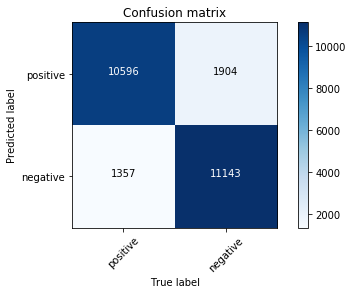

In [46]:
import numpy as np
plot_confusion_matrix(cnf_matrix, classes=["positive","negative"], normalize=False)
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_b, y_test))

             precision    recall  f1-score   support

          0       0.86      0.88      0.87     12296
          1       0.88      0.87      0.87     12704

avg / total       0.87      0.87      0.87     25000



['acc', 'loss', 'val_acc', 'val_loss']


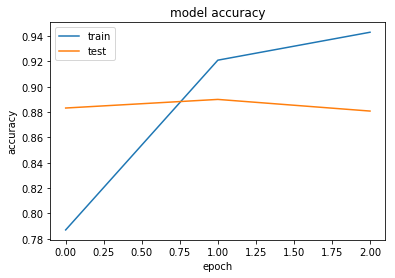

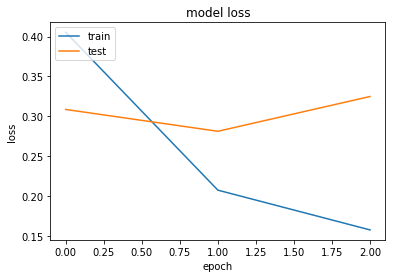

In [49]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()